In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import os, types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d7d7ee7f17bd4f4b93775006b93e42f5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MALfvt1g5BJRor3hmfD2KamywFIHQxBPaTKhShnYjb8Y',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_d7d7ee7f17bd4f4b93775006b93e42f5.get_object(Bucket='realtimeairqualitymonitoring-donotdelete-pr-cholkirtxdsswx',Key='city_day.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_set = pd.read_csv(body)
data_set.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
data_set['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [7]:
df = data_set[data_set['City']=='Bengaluru']
df.head

<bound method NDFrame.head of            City        Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
4294  Bengaluru  2015-01-01    NaN    NaN   3.26  17.33  10.88  20.36   0.33   
4295  Bengaluru  2015-01-02    NaN    NaN   6.05  19.73  14.14  23.74   1.35   
4296  Bengaluru  2015-01-03    NaN    NaN  11.91  19.88  20.72   4.32  17.40   
4297  Bengaluru  2015-01-04    NaN    NaN   7.45  21.61  16.88   0.87   5.05   
4298  Bengaluru  2015-01-05    NaN    NaN   9.52  22.17  21.76  31.38   1.83   
...         ...         ...    ...    ...    ...    ...    ...    ...    ...   
6298  Bengaluru  2020-06-27  16.60  29.48   3.06  13.68  13.07   6.88   0.67   
6299  Bengaluru  2020-06-28  20.44  26.34   2.69  10.33  10.58   6.58   0.66   
6300  Bengaluru  2020-06-29  28.68  29.27   3.62  12.12  12.94   6.80   0.56   
6301  Bengaluru  2020-06-30  14.47  24.26   4.61  12.69  15.00   6.82   0.56   
6302  Bengaluru  2020-07-01  17.50  30.48   3.95  13.25  14.83   7.42   0.54   

        S

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 4294 to 6302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [9]:
df.isnull().sum()

City             0
Date             0
PM2.5          146
PM10           360
NO               6
NO2              6
NOx              4
NH3            203
CO              11
SO2              6
O3             144
Benzene        266
Toluene         93
Xylene        2009
AQI             99
AQI_Bucket      99
dtype: int64

In [10]:
df= df.drop(['Xylene','Benzene','O3'], axis=1)

<AxesSubplot:>

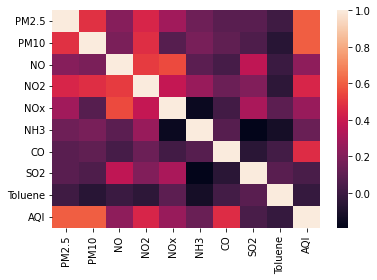

In [11]:
#df1['City'].unique()
df = df.dropna()

#df2 = df1[df1['City']=='Bangaluru']
sns.heatmap(df.corr())

In [12]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000
mean,37.249780,85.181409,10.485106,30.126027,21.657181,21.938159,0.999186,5.580092,3.275425,93.291076
std,22.435872,38.358589,7.547697,12.693366,16.317309,12.690103,0.933517,2.142710,6.113530,35.321379
min,7.020000,9.930000,1.410000,5.530000,0.000000,3.830000,0.080000,1.100000,0.000000,26.000000
25%,21.840000,57.160000,6.017500,21.687500,10.125000,14.137500,0.710000,4.300000,1.170000,67.000000
50%,32.560000,79.005000,8.640000,29.050000,22.750000,19.150000,0.870000,5.360000,1.810000,87.000000
75%,46.775000,105.340000,12.782500,36.102500,31.417500,26.040000,1.040000,6.592500,2.892500,111.000000
max,313.590000,351.510000,95.190000,142.350000,147.060000,120.070000,15.930000,24.020000,68.020000,335.000000


<AxesSubplot:>

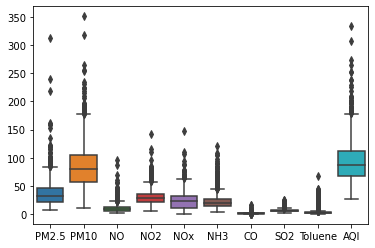

In [13]:
sns.boxplot(data=df)

In [14]:
drop_outlier = df[(df['AQI']>500) | (df['PM2.5']>180) | (df['NO']>65) |(df['NH3']>50) | (df['NO2']>90) | (df['NOx']>100) |(df['PM10']>250)].index

In [15]:
df = df.drop(drop_outlier)
#DF=DF.drop(drop_outlier2)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 4604 to 6302
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1349 non-null   object 
 1   Date        1349 non-null   object 
 2   PM2.5       1349 non-null   float64
 3   PM10        1349 non-null   float64
 4   NO          1349 non-null   float64
 5   NO2         1349 non-null   float64
 6   NOx         1349 non-null   float64
 7   NH3         1349 non-null   float64
 8   CO          1349 non-null   float64
 9   SO2         1349 non-null   float64
 10  Toluene     1349 non-null   float64
 11  AQI         1349 non-null   float64
 12  AQI_Bucket  1349 non-null   object 
dtypes: float64(10), object(3)
memory usage: 147.5+ KB


<AxesSubplot:>

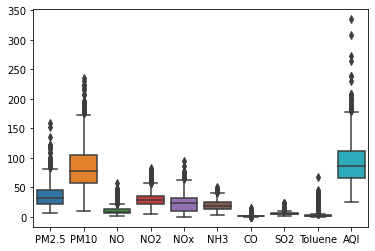

In [16]:
sns.boxplot(data= df)

<AxesSubplot:xlabel='AQI', ylabel='PM2.5'>

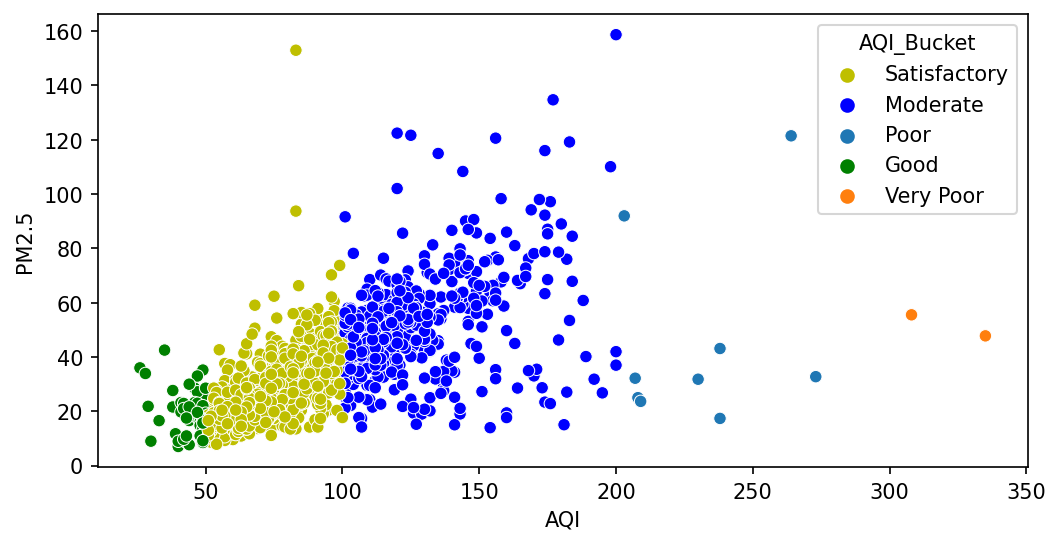

In [17]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM2.5', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

<AxesSubplot:xlabel='AQI', ylabel='NO2'>

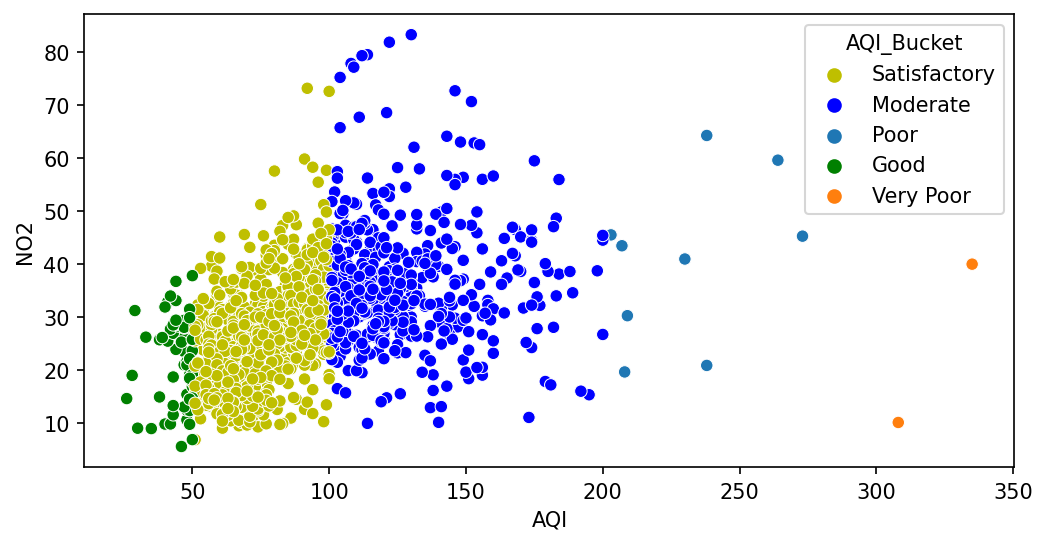

In [18]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NO2', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

<AxesSubplot:xlabel='AQI', ylabel='NH3'>

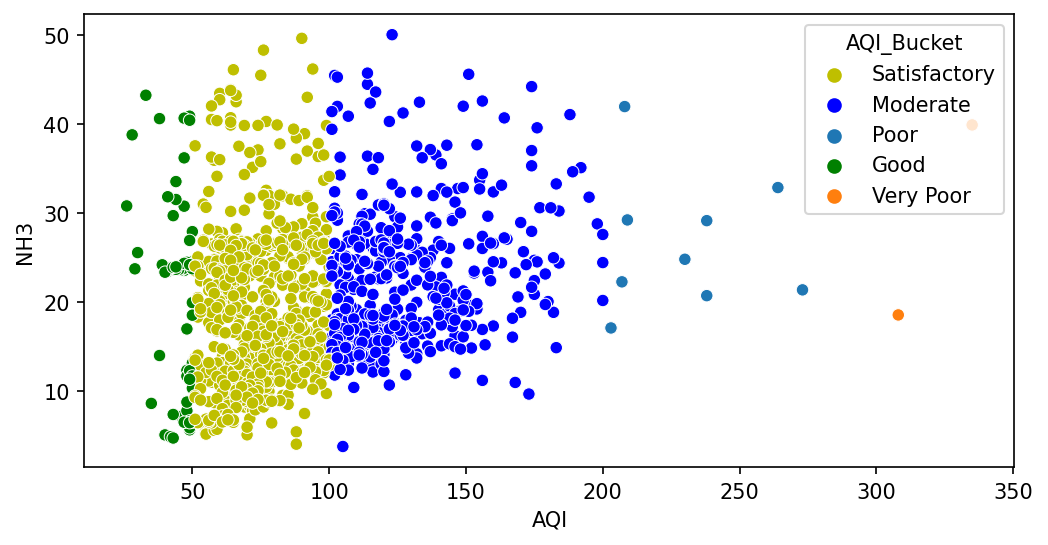

In [19]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NH3', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

<AxesSubplot:xlabel='AQI', ylabel='NOx'>

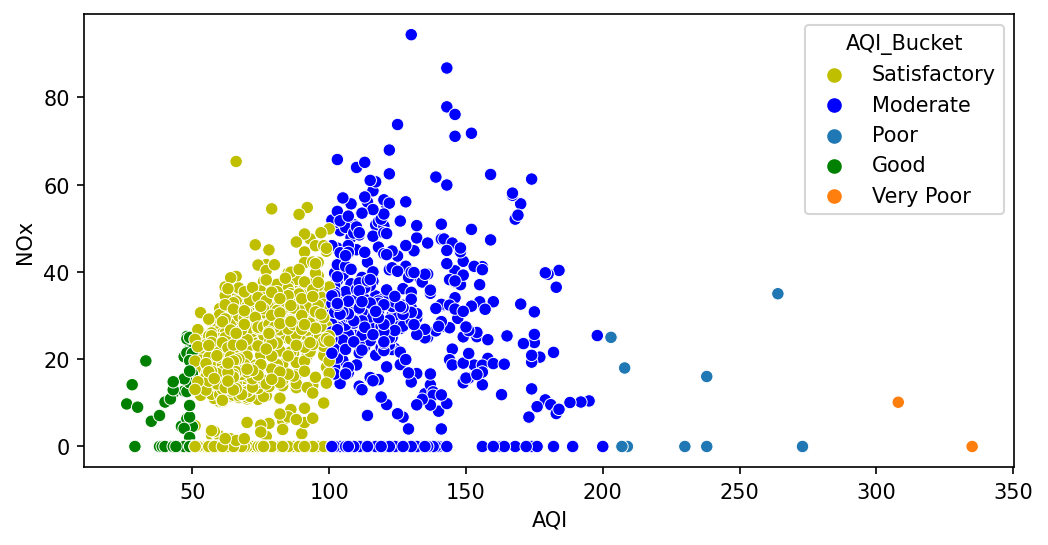

In [20]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NOx', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

<AxesSubplot:xlabel='AQI', ylabel='PM10'>

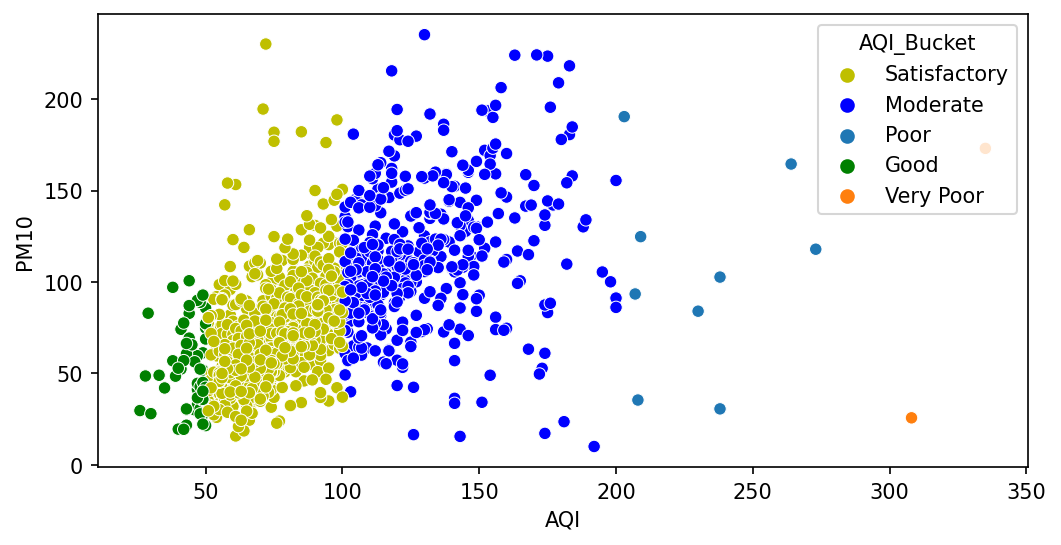

In [21]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM10', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

In [22]:
drop_outlier1 = df[(df['AQI']<165) & (df['PM10']>200)].index
drop_outlier2 = df[(df['AQI']>200) & (df['PM10']<110)].index
df = df.drop(drop_outlier1)
df = df.drop(drop_outlier2)

<AxesSubplot:xlabel='AQI', ylabel='PM10'>

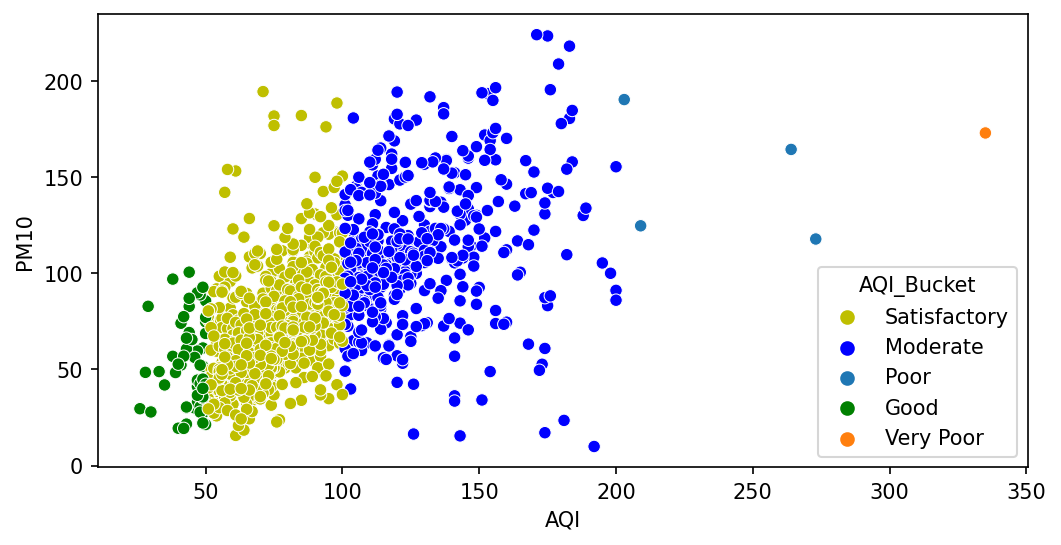

In [23]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'PM10', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

<AxesSubplot:xlabel='AQI', ylabel='NO'>

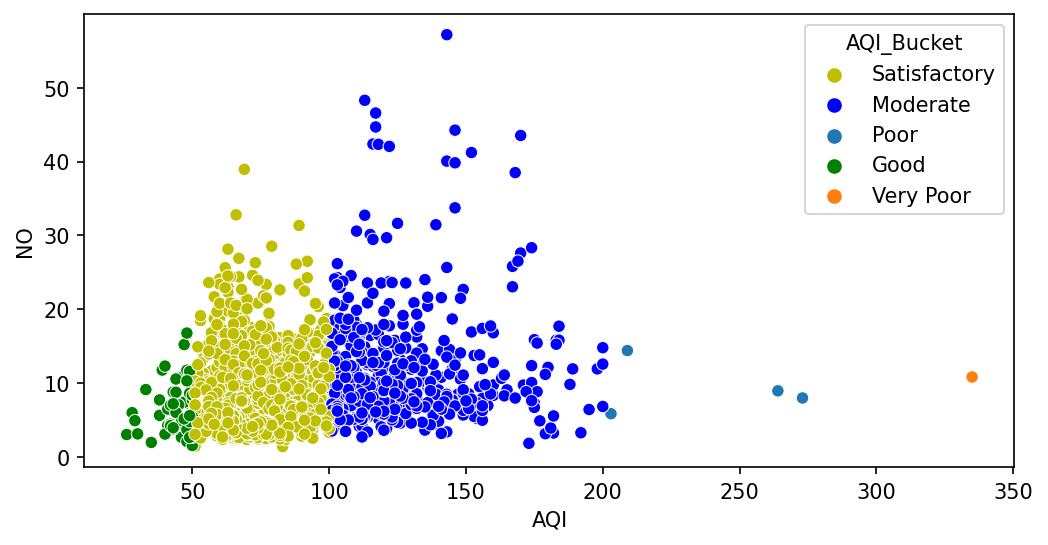

In [24]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NO', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

<AxesSubplot:xlabel='AQI', ylabel='SO2'>

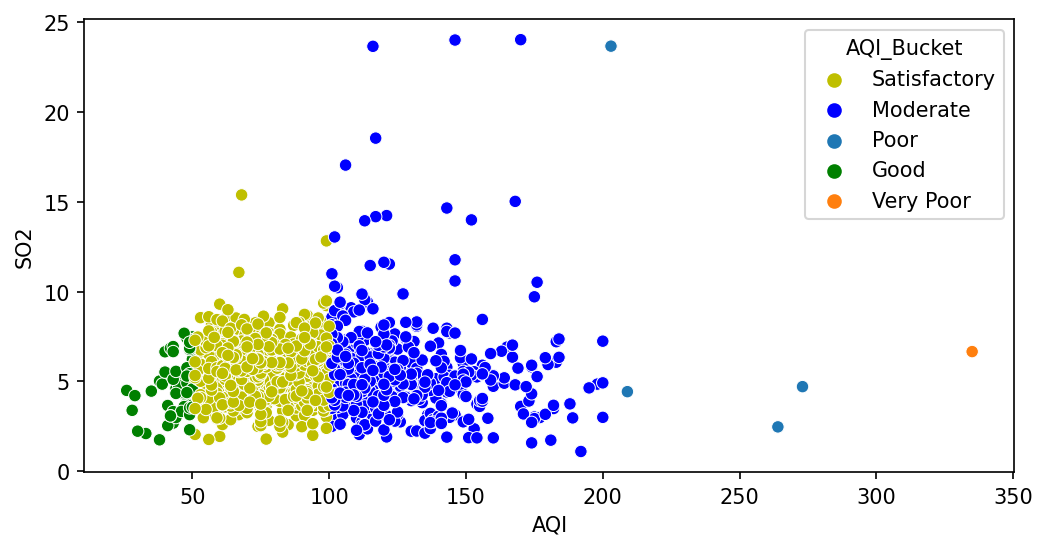

In [25]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'SO2', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

<AxesSubplot:xlabel='AQI', ylabel='Toluene'>

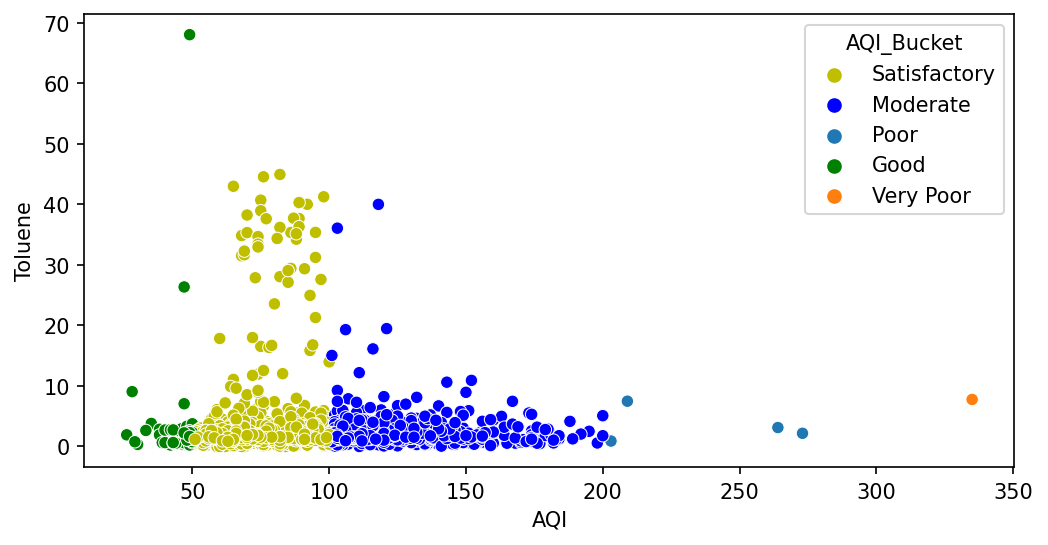

In [26]:
plt.figure(figsize=(8,4),dpi=150)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'Toluene', data=df,hue ='AQI_Bucket',palette = palette, ci= None)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 4604 to 6302
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1338 non-null   object 
 1   Date        1338 non-null   object 
 2   PM2.5       1338 non-null   float64
 3   PM10        1338 non-null   float64
 4   NO          1338 non-null   float64
 5   NO2         1338 non-null   float64
 6   NOx         1338 non-null   float64
 7   NH3         1338 non-null   float64
 8   CO          1338 non-null   float64
 9   SO2         1338 non-null   float64
 10  Toluene     1338 non-null   float64
 11  AQI         1338 non-null   float64
 12  AQI_Bucket  1338 non-null   object 
dtypes: float64(10), object(3)
memory usage: 146.3+ KB


In [28]:
X= df.drop(['City', 'AQI_Bucket', 'AQI','Date'], axis= 1)

In [29]:
y= df['AQI']

<AxesSubplot:>

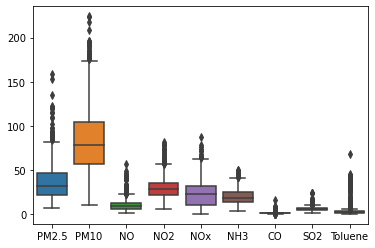

In [30]:
sns.boxplot(data=X)

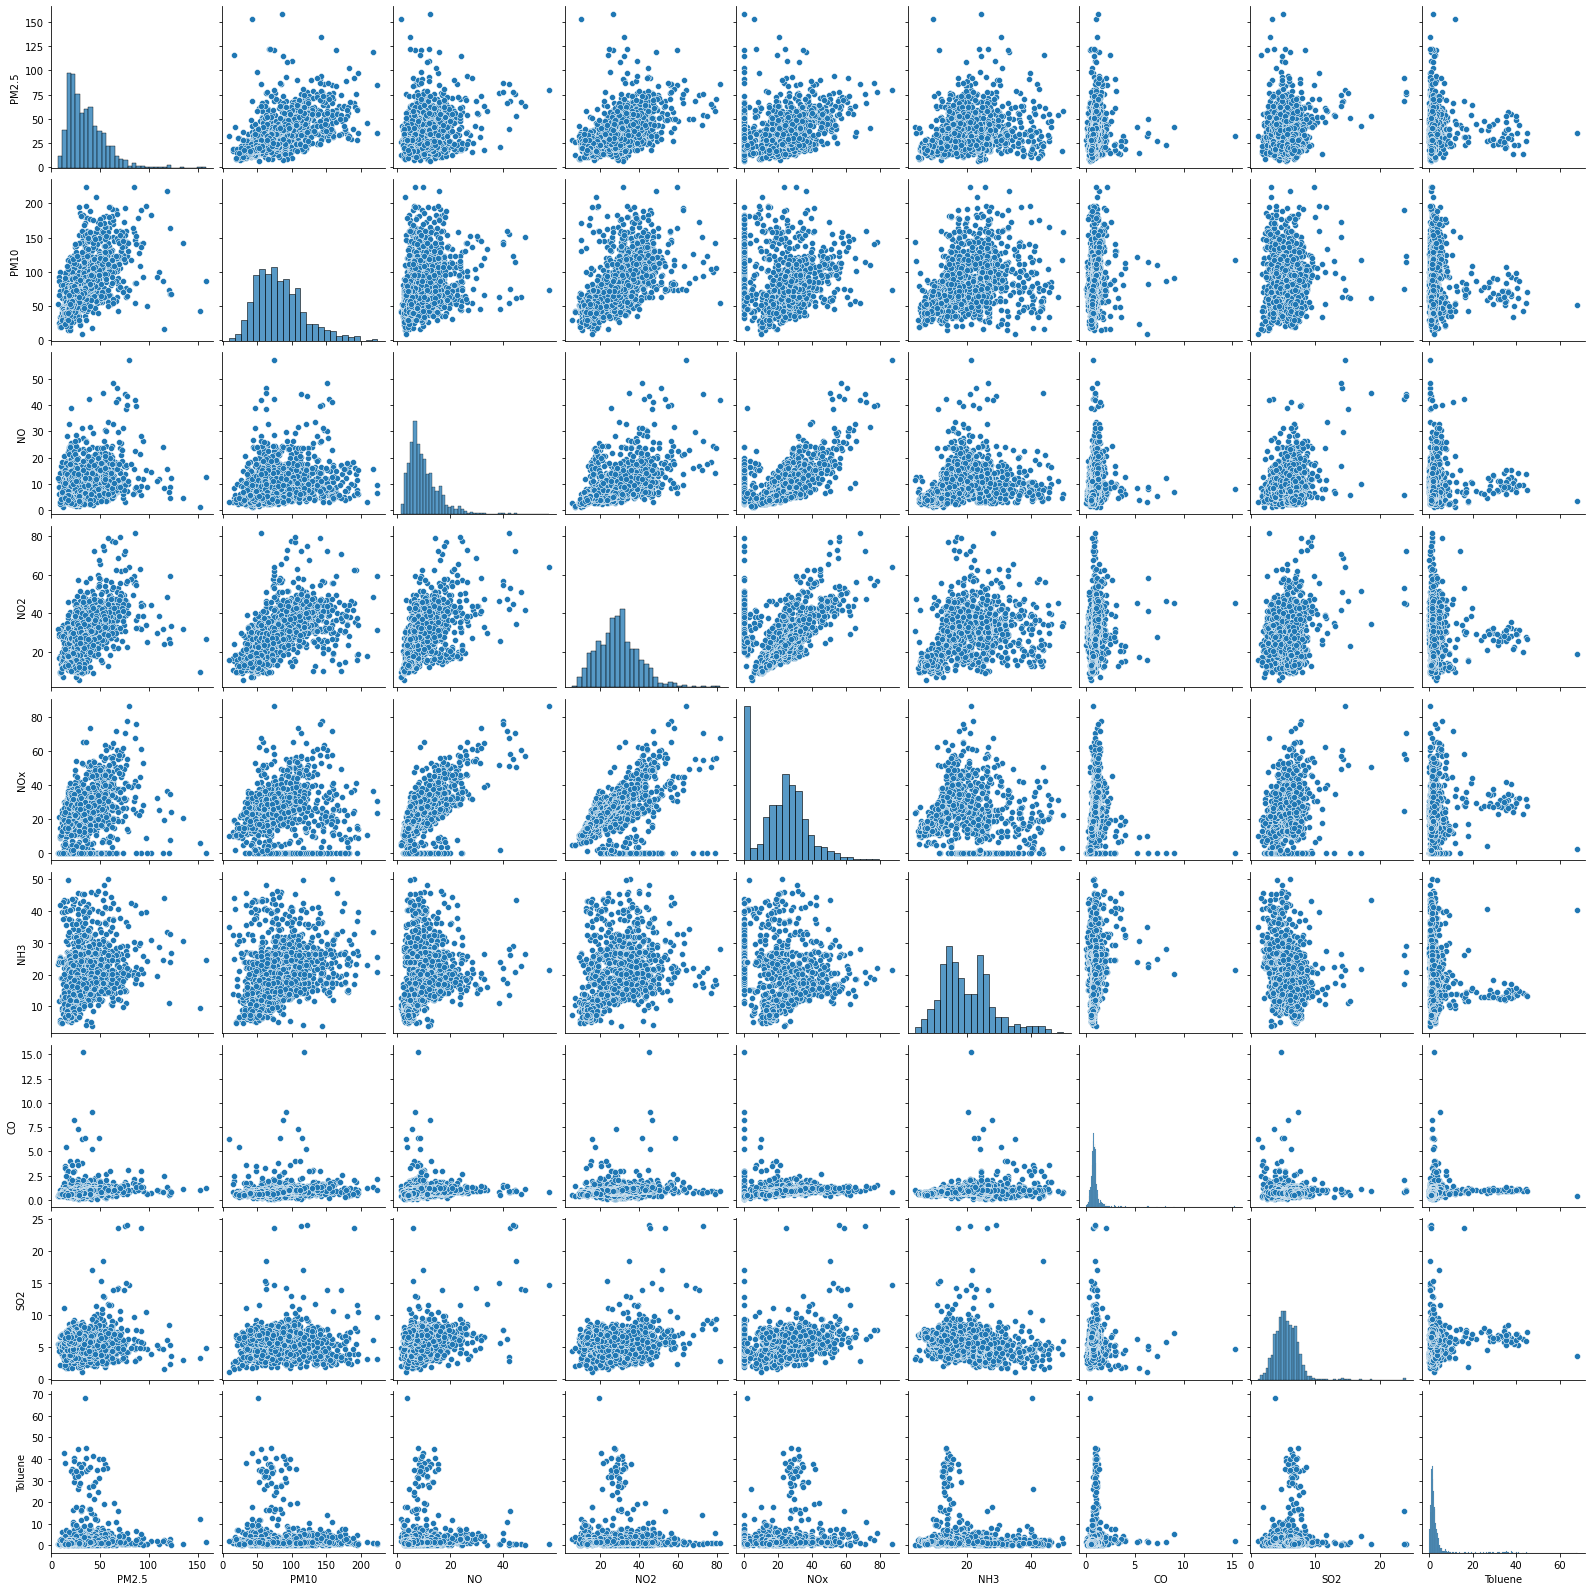

In [31]:
sns.pairplot(data=X)

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 4604 to 6302
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    1338 non-null   float64
 1   PM10     1338 non-null   float64
 2   NO       1338 non-null   float64
 3   NO2      1338 non-null   float64
 4   NOx      1338 non-null   float64
 5   NH3      1338 non-null   float64
 6   CO       1338 non-null   float64
 7   SO2      1338 non-null   float64
 8   Toluene  1338 non-null   float64
dtypes: float64(9)
memory usage: 104.5 KB


In [33]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [34]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene
4604,31.44,70.46,3.03,15.85,10.27,27.73,1.22,1.94,17.84
4607,12.63,43.64,1.46,6.81,4.75,12.63,1.48,2.05,2.07
4610,28.22,153.30,5.80,21.50,21.78,27.79,2.09,2.69,4.50
4611,42.42,156.84,7.25,29.94,31.78,21.94,1.56,2.23,4.65
4615,19.32,16.42,4.57,15.47,18.77,25.00,1.99,2.75,1.15


In [35]:
print(model.feature_importances_)

[0.32666266 0.26483576 0.02525586 0.05203511 0.04323824 0.04003094
 0.18176001 0.03217715 0.03400426]


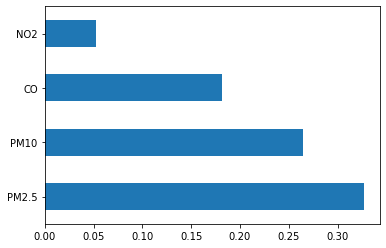

In [36]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9580298569573483
Coefficient of determination R^2 <-- on train set: 0.7001248424602695


In [39]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=3)

In [41]:
score.mean()

0.6394784680530222

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

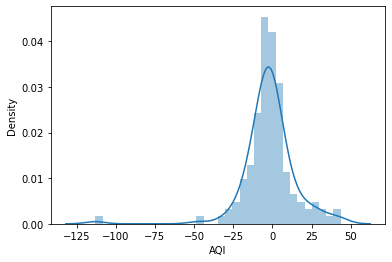

In [42]:
prediction=regressor.predict(X_test)

sns.distplot(y_test-prediction)

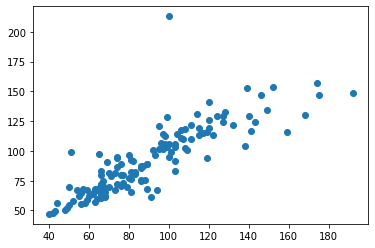

In [43]:
plt.scatter(y_test,prediction)

In [44]:
RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [45]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_est

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   1.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1200; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   2.2s
[CV] END max_depth=20, max_

[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END max_depth=30, max_featur

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [50]:
rf_random.best_score_

-343.7905048269916

In [51]:
predictions=rf_random.predict(X_test)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

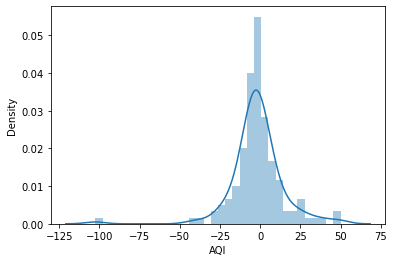

In [52]:
sns.distplot(y_test-predictions)

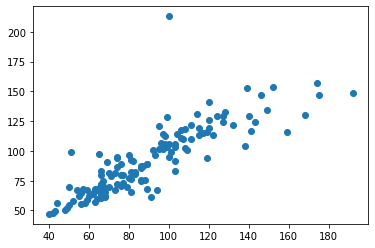

In [53]:
plt.scatter(y_test,prediction)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 10.309539171650025
MSE: 267.3835608195445
RMSE: 16.351867196731526


In [55]:
def predict_AQi(pm25,pm10,no,no2,nox,nh3,co,so2,tol):
    pm25 = float(pm25)
    pm10 = float(pm10)
    no = float(no)
    no2 = float(no2)
    nox = float(nox)
    nh3 = float(nh3)
    co = float(co)
    so2 = float(so2)
    tol = float(tol)
    x = [[pm25,pm10,no,no2,nox,nh3,co,so2,tol]]

    return rf_random.predict(x)

In [56]:
# Prediction 1
# Input sequence: pm25,pm10,no,no2,nox,nh3,co,so2,tol
predictions = predict_AQi(14.52,0,6.1,1.75,3.71,4.41,1.34,7.5,1.14)[0]
if predictions:
  print('Aqi Value is :.' ,predictions)

Aqi Value is :. 90.59705176767679


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [57]:
# Prediction 2
# Input sequence: pm25,pm10,no,no2,nox,nh3,co,so2,tol
predictions = predict_AQi(27.25,0,0.86,5.23,2.93,6.4,15.98,10.62,14.54)[0]
if predictions:
  print('Aqi Value is :.' ,predictions)

Aqi Value is :. 160.89527910052914


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


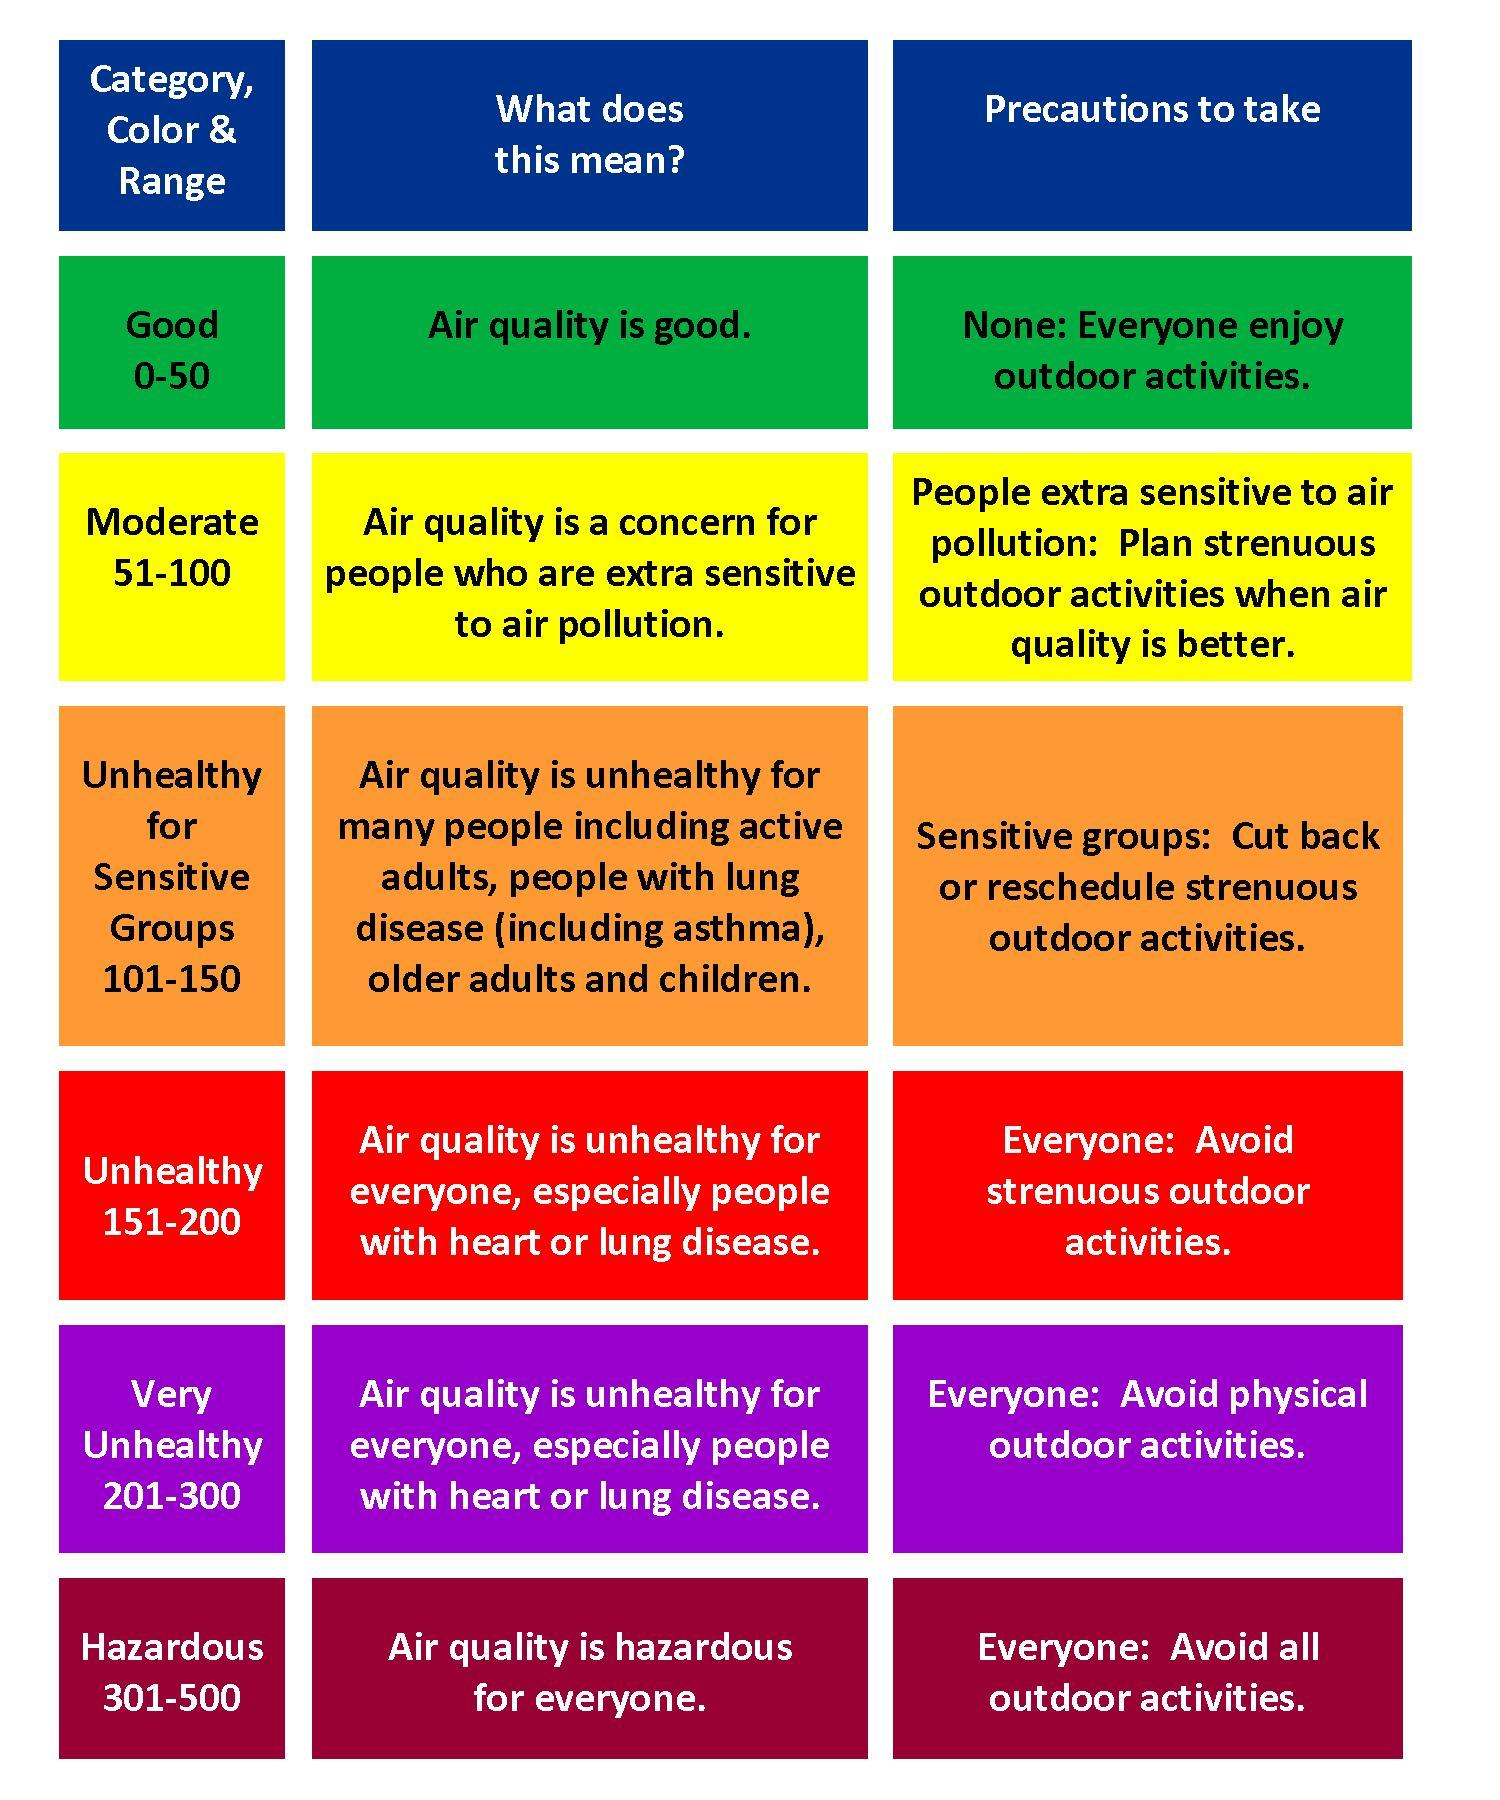
